<a href="https://colab.research.google.com/github/wiksksmat/studia/blob/main/praca_domowa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing, fetch_openml
from sklearn.decomposition import PCA

In [ ]:
data = fetch_california_housing(as_frame=True)['data']
print(data)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1

## Zadania cz.1

1.1 Przygotować funkcję, która na podstawie algorytmu PCA wyznaczy minimalną liczbę głównych składowych objaśniających przekazany w parametrze współczynnik wariancji.
1.2 Przygotować klasę Compressor, która przyjmie w inicjalizatorze zbiór danych w postaci ramki oraz oczekiwany współczynnik wariancji wyjaśnionej i będzie posiadała następujące metody:
   1. compress: zredukuje rozmiar danych i usunie oryginalną ramkę
   2. inverse: przywróci dane do pierwotnego rozmiaru
   3. Przy implementacji wykorzystać metodę PCA    
1.3 Przygotować potok dla zbioru danych *california_housing*, który wyznaczy najbardziej optymalną liczbe głównych składowych dla zadania regresji przeprowadzonego za pomocą algorytmu regresji liniowej.
1.4 Porównać wynik uzyskany w zadaniu 3. za pomocą metody "łokcia" reprezentującego najbardziej optymalną liczbę głównych składowych.

# Zadanie 1.1
Przygotować funkcję, która na podstawie algorytmu PCA wyznaczy minimalną liczbę głównych składowych objaśniających przekazany w parametrze współczynnik wariancji.

In [ ]:
def pca_by_given_variance(dataframe,variance_ratio):
  #należałoby pewnie sprawdzić czy dane są liczbowe w tabeli czy variance ratio należy do przedziału (0,1), czy dane nie zawierają braków
  pca=PCA(random_state=2,n_components=variance_ratio)
  if not 0 <variance_ratio <1:
     raise AttributeError("variance_ratio musi nalezec (0:1)")
  return pca.fit_transform(dataframe)


data_reduced=pca_by_given_variance(data,0.999998)



print(data_reduced)
print(data_reduced.shape)
print(data_reduced.shape[1])

[[-1.10351265e+03  8.56663624e+00 -7.74104267e-01  3.55896355e+00
   2.73671858e+00 -3.74666242e+00]
 [ 9.75541244e+02 -4.67041774e+00 -1.02568060e+00  3.94605936e+00
   1.64756479e+00 -3.91094740e+00]
 [-9.29549908e+02  2.00346509e+01 -1.97273701e+00  3.90347639e+00
   3.96784052e+00 -2.26989335e+00]
 ...
 [-4.18437575e+02 -1.29082558e+01  1.01901295e+00  3.51108761e+00
  -2.58145839e+00  1.75428879e+00]
 [-6.84439525e+02 -1.27945805e+01  9.74409305e-01  3.53335100e+00
  -2.42779622e+00  1.63168668e+00]
 [-3.84362474e+01 -1.26703781e+01  1.04286818e+00  3.63115237e+00
  -2.19840471e+00  1.17996360e+00]]
(20640, 6)
6


#zadanie 1.2
Przygotować klasę Compressor, która przyjmie w inicjalizatorze zbiór danych w postaci ramki oraz oczekiwany współczynnik wariancji wyjaśnionej i będzie posiadała następujące metody:
compress: zredukuje rozmiar danych i usunie oryginalną ramkę
inverse: przywróci dane do pierwotnego rozmiaru
Przy implementacji wykorzystać metodę PCA

In [ ]:
#może klepiej by było gdyby klasa nie przechowywała bazy danych

class Compressor:
    """
    A class for dimensionality reduction of data using Principal Component Analysis (PCA).

    Attributes:
        dataframe (pandas.DataFrame): The input DataFrame to be compressed.
        pca (sklearn.decomposition.PCA): The PCA object used for compression.
    """

    def __init__(self, dataframe):
        """
        Initializes the Compressor object with the input DataFrame.

        Args:
            dataframe (pandas.DataFrame): The DataFrame to be compressed.
        """

        self.dataframe = dataframe
        self.pca = None  # Initialize PCA object as None until compression is performed

    def compress(self, variance_ratio):
        """
        Compresses the data using PCA to retain a specified proportion of variance.

        Args:
            variance_ratio (float): The desired proportion of variance to retain (0.0 to 1.0).

        Returns:
            numpy.ndarray: The compressed data representation.

        Raises:
            ValueError: If the `variance_ratio` is outside the valid range (0.0 to 1.0).
        """

        if variance_ratio < 0 or variance_ratio > 1:
            raise ValueError("variance_ratio must be between 0.0 and 1.0")

        self.pca = PCA(n_components=variance_ratio, random_state=2)  # Create PCA object
        return self.pca.fit_transform(self.dataframe)  # Fit and transform data

    def inverse(self, data_reduced):
        """
        Inverts the compressed data back to its original dimensionality (if possible).

        Args:
            data_reduced (numpy.ndarray): The compressed data representation.

        Returns:
            pandas.DataFrame (or numpy.ndarray, depending on input):
                The reconstructed data (may not be identical to the original due to PCA compression).

        Raises:
            AttributeError: If the PCA object hasn't been fitted yet (i.e., `compress` hasn't been called).
        """

        if self.pca is None:
            raise AttributeError("PCA object is not fitted. Call `compress` first.")

        return self.pca.inverse_transform(data_reduced)
compressor_object = Compressor(data)

# Compress the data to retain 98% of the variance
data_reduced = compressor_object.compress(0.98)
print(data_reduced)
print(data_reduced.shape)
print(type(data_reduced))

# Invert the compressed data (may not be exactly the same as the original)
data_inversed = compressor_object.inverse(data_reduced)
print(data_inversed.shape)



#to spory minus ze tak sie da,czy nie?
print(compressor_object.dataframe)

[[-1103.51264821]
 [  975.54124441]
 [ -929.54990812]
 ...
 [ -418.43757543]
 [ -684.43952537]
 [  -38.43624736]]
(20640, 1)
<class 'numpy.ndarray'>
(20640, 8)
       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.17

#zadanie 1.3
Przygotować potok dla zbioru danych california_housing, który wyznaczy najbardziej optymalną liczbe głównych składowych dla zadania regresji przeprowadzonego za pomocą algorytmu regresji liniowej.

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV  # Corrected import for feature selection
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
# Load or prepare your data (replace 'data' with your actual data)
data = fetch_california_housing(as_frame=True)['data']

# Extract features (excluding 'AveBedrms') and target variable
X = data.drop('AveBedrms', axis=1)  # Features (independent variables)
y = data['AveBedrms']               # Target variable (dependent variable)

# Split data into training and testing sets (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
linreg = LinearRegression()

# Feature selection using Recursive Feature Elimination with Cross-Validation (RFECV)
# - This helps identify the most important features for the model's performance.
# - 'step=1' removes one feature at each iteration.
# - 'cv=4' uses 4-fold cross-validation to evaluate feature subsets.
rfecv = RFECV(estimator=linreg, step=1, cv=4)  # Corrected estimator parameter

# Fit the model with feature selection on the training data
rfecv.fit_transform(X_train, y_train)

# Make predictions on the testing set using the selected features
y_pred = rfecv.predict(X_test)

# Evaluate model performance using Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")  # Format MAE to two decimal places

# Print the optimal number of features identified by RFECV
print(f"Optimal number of features: {rfecv.n_features_}")

# Extract the names of the selected features from the training data columns
selected_features = X_train.columns[rfecv.support_]
print(f"Selected features: {selected_features.to_list()}")

Mean Absolute Error (MAE): 0.12
Optimal number of features: 4
Selected features: ['MedInc', 'AveRooms', 'Latitude', 'Longitude']


#1.3 inne podejscie


Mean Absolute Error (MAE): 0.12


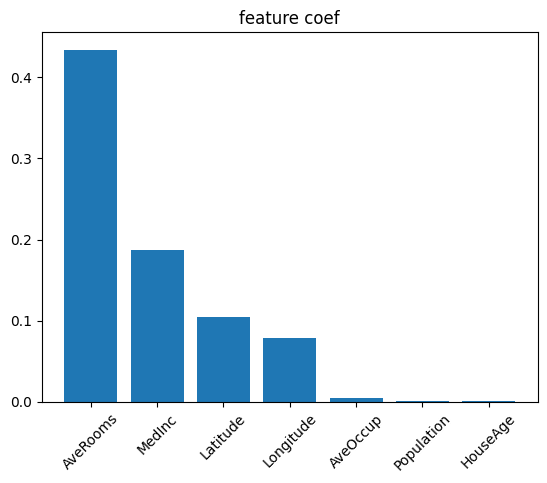

In [ ]:
# Load or prepare your data (replace 'data' with your actual data)
data = fetch_california_housing(as_frame=True)['data']

# Extract features (excluding 'AveBedrms') and target variable
X = data.drop('AveBedrms', axis=1)  # Features (independent variables)
y = data['AveBedrms']               # Target variable (dependent variable)

# spliting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and Train the Pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('selector', SelectFromModel(estimator=linreg)),        # Select important features
    ('linear', LinearRegression())  # Linear regression model
])
pipe.fit(X_train,y_train)  # Train the pipeline on training data

# Make predictions on unseen data
y_pred = pipe.predict(X_test)

# Evaluate Model Performance
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")  # Print MAE with two decimals

# plot coefs
importance = np.abs(pipe['selector'].estimator_.coef_)  # Absolute coefficients
importance_feature_dict = {feature: importance_value for feature, importance_value in zip(X.columns, importance)}
sorted_importance_feature_dict=dict(sorted(importance_feature_dict.items(), key=lambda item: item[1],reverse=True))
plt.bar(height=sorted_importance_feature_dict.values(), x=sorted_importance_feature_dict.keys())
plt.title("feature coef")
plt.xticks(rotation=45)
plt.show()

## Zadania cz.  2

2.1. Wykorzystać metodę *k-średnich* do znalezienia optymalnej liczby skupień dla zbioru `california housing`

2.2 Korzystając z metody *analizy głównych składowych* znaleźć optimum polegające na jak najmniejszej wartości *współczynnika profilu* przy zachowaniu najmniejszej liczby wymiarów (*).

2.3 Powtórzyć proces z zadania 2 dla poznanych modyfikacji algorytmu *k-średnich*.


#zadanie 2.1
2.1. Wykorzystać metodę k-średnich do znalezienia optymalnej liczby skupień dla zbioru california housing

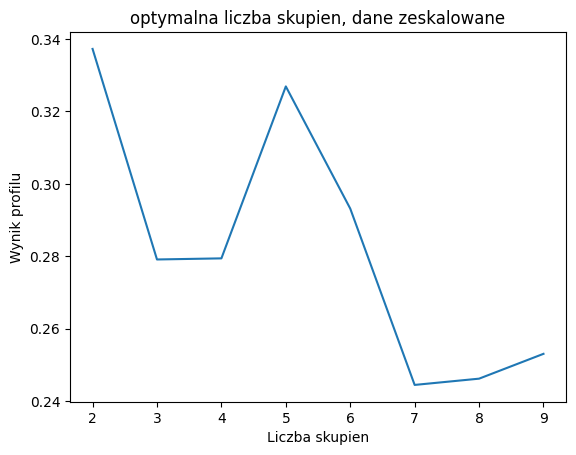

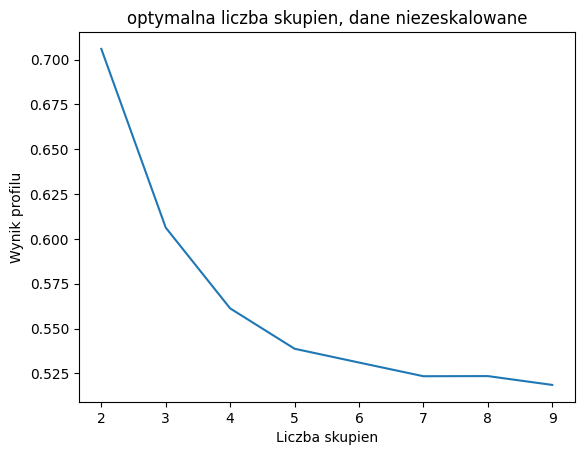

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_california_housing, fetch_openml
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

data = fetch_california_housing(as_frame=True)['data']

# Extract features (excluding 'AveBedrms') and target variable
X = data.drop('AveBedrms', axis=1)  # Features (independent variables)
y = data['AveBedrms']               # Target variable (dependent variable)

scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)

silhouette_scores_scaled_X = []
clusters = np.arange(2, 10)

for k in clusters:
  kmeans = KMeans(n_clusters=k, n_init='auto', random_state=42)
  y_pred = kmeans.fit_predict(scaled_X)
  score = silhouette_score(scaled_X, y_pred)
  silhouette_scores_scaled_X.append(score)

plt.title('optymalna liczba skupien, dane zeskalowane')
plt.xlabel('Liczba skupien')
plt.ylabel('Wynik profilu')

plt.plot(clusters, silhouette_scores_scaled_X)

plt.show()

silhouette_scores=[]
for k in clusters:
  kmeans = KMeans(n_clusters=k, n_init='auto', random_state=42)
  y_pred = kmeans.fit_predict(X)
  score = silhouette_score(X, y_pred)
  silhouette_scores.append(score)
plt.title('optymalna liczba skupien, dane niezeskalowane')
plt.xlabel('Liczba skupien')
plt.ylabel('Wynik profilu')

plt.plot(clusters, silhouette_scores)

plt.show()




#zadanie 2.2
 Korzystając z metody analizy głównych składowych znaleźć optimum polegające na jak największej wartości współczynnika profilu przy zachowaniu najmniejszej liczby wymiarów (*).

Optimal number of clusters: 2


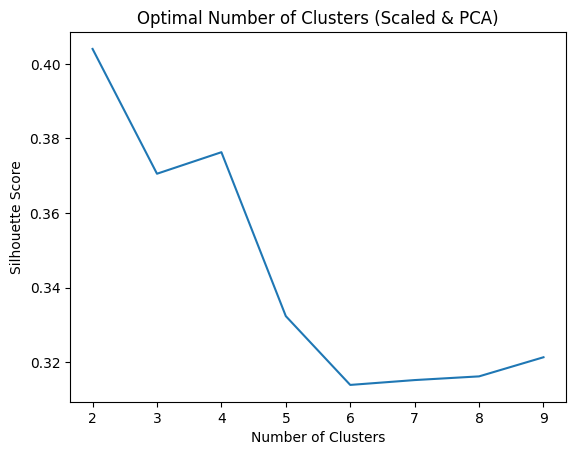

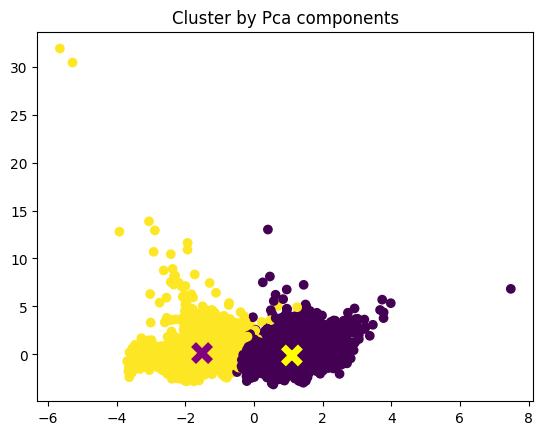

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_california_housing, fetch_openml
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


# Load California housing dataset
data = fetch_california_housing(as_frame=True)['data']

# Extract features (excluding 'AveBedrms') and target variable
X = data.drop('AveBedrms', axis=1)  # Features (independent variables)
y = data['AveBedrms']               # Target variable (dependent variable)

# Standardize features for better clustering
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

# Apply PCA to reduce dimensionality (capturing 80% variance)
pca = PCA(n_components=0.8)
x_scaled_pca = pca.fit_transform(x_scaled)

# List to store silhouette scores for different cluster numbers
silhouette_scores = []

# Range of clusters to evaluate (2 to 9)
clusters = np.arange(2, 10)

# Loop through different cluster numbers (k)
for k in clusters:
    # Initialize KMeans model with random_state, number of clusters (k),
    # automatic initialization, and k-means++ initialization method
    kmeans = KMeans(random_state=23, n_clusters=k, n_init='auto', init='k-means++')

    # Predict cluster labels for data points
    y_pred = kmeans.fit_predict(x_scaled_pca)

    # Calculate silhouette score to evaluate clustering quality
    score = silhouette_score(x_scaled_pca, y_pred)
    silhouette_scores.append(score)


# Print the optimal number of clusters based on silhouette score
print('Optimal number of clusters:', (np.argmax(silhouette_scores) + 2))

# Plot to visualize silhouette scores vs number of clusters
plt.title('Optimal Number of Clusters (Scaled & PCA)')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.plot(clusters, silhouette_scores)
plt.show()

# Create KMeans model with the optimal number of clusters
kmeans = KMeans(random_state=23, n_clusters=np.argmax(silhouette_scores) + 2, n_init='auto', init='k-means++')

# Predict cluster labels for data points again
y_pred = kmeans.fit_predict(x_scaled_pca)

# Scatter plot of data points colored by their cluster labels
plt.scatter(x_scaled_pca[:, 0], x_scaled_pca[:, 1], c=y_pred)
plt.title('Cluster by Pca components')
# Extract centroids (cluster centers) locations
centroids_x = kmeans.cluster_centers_[:, 0]
centroids_y = kmeans.cluster_centers_[:, 1]

# Plot centroids as larger yellow and purple 'x' markers
plt.scatter(centroids_x, centroids_y, marker="x", s=150, linewidths=5, zorder=10, c=['yellow', 'purple'])

plt.show()